In [1]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

from Visualizations import visualize_one_sample, plot_pansharpen_examples
from models.PansharpeningUnetLightning import PanSharpenUnetLightning
from SentinelData import SentinelCroppedDataset
from Training import compute_stats

/home/jrosa/AGH_FILES/GSN-2025W-PuchaczPansharpening/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


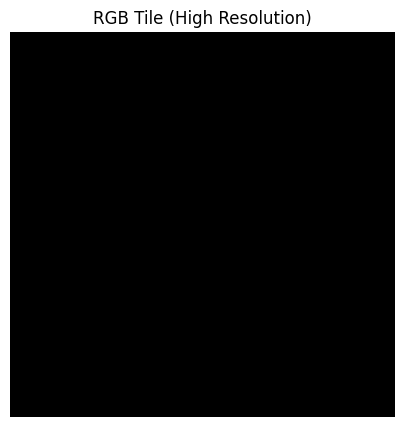

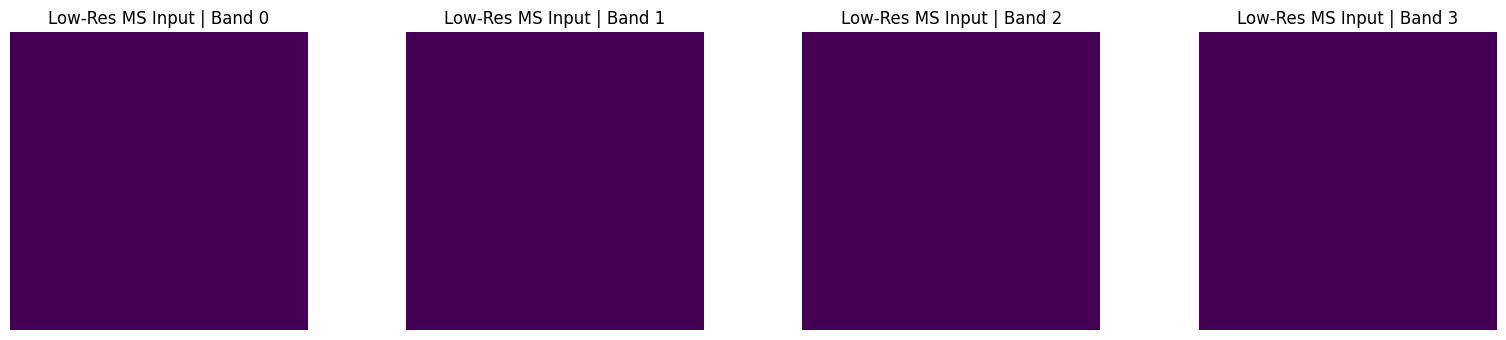

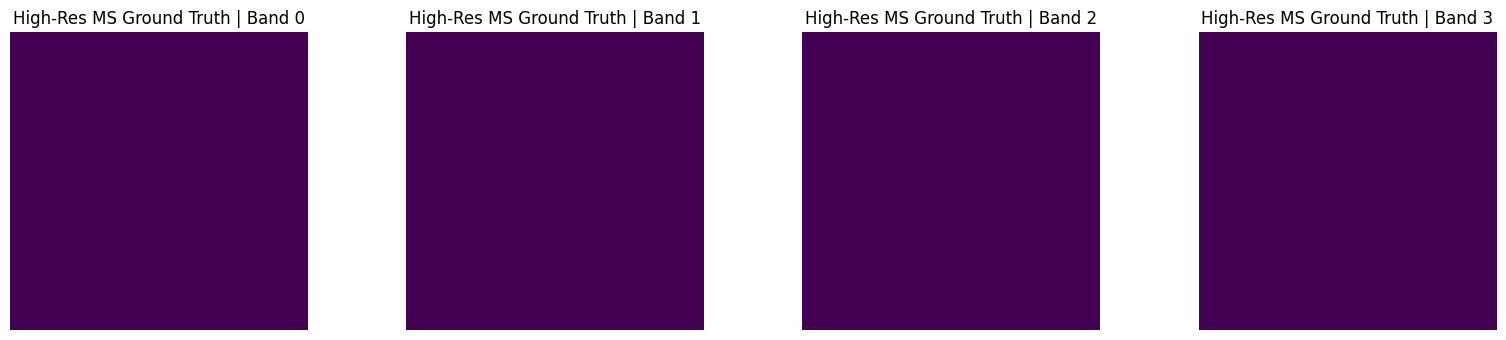

Displayed sample tiles from: val loader.


In [2]:
visualize_one_sample(
        data_path="./dataset_sentinel/",
        loader_type="val",    # or "val" or "test"
    )

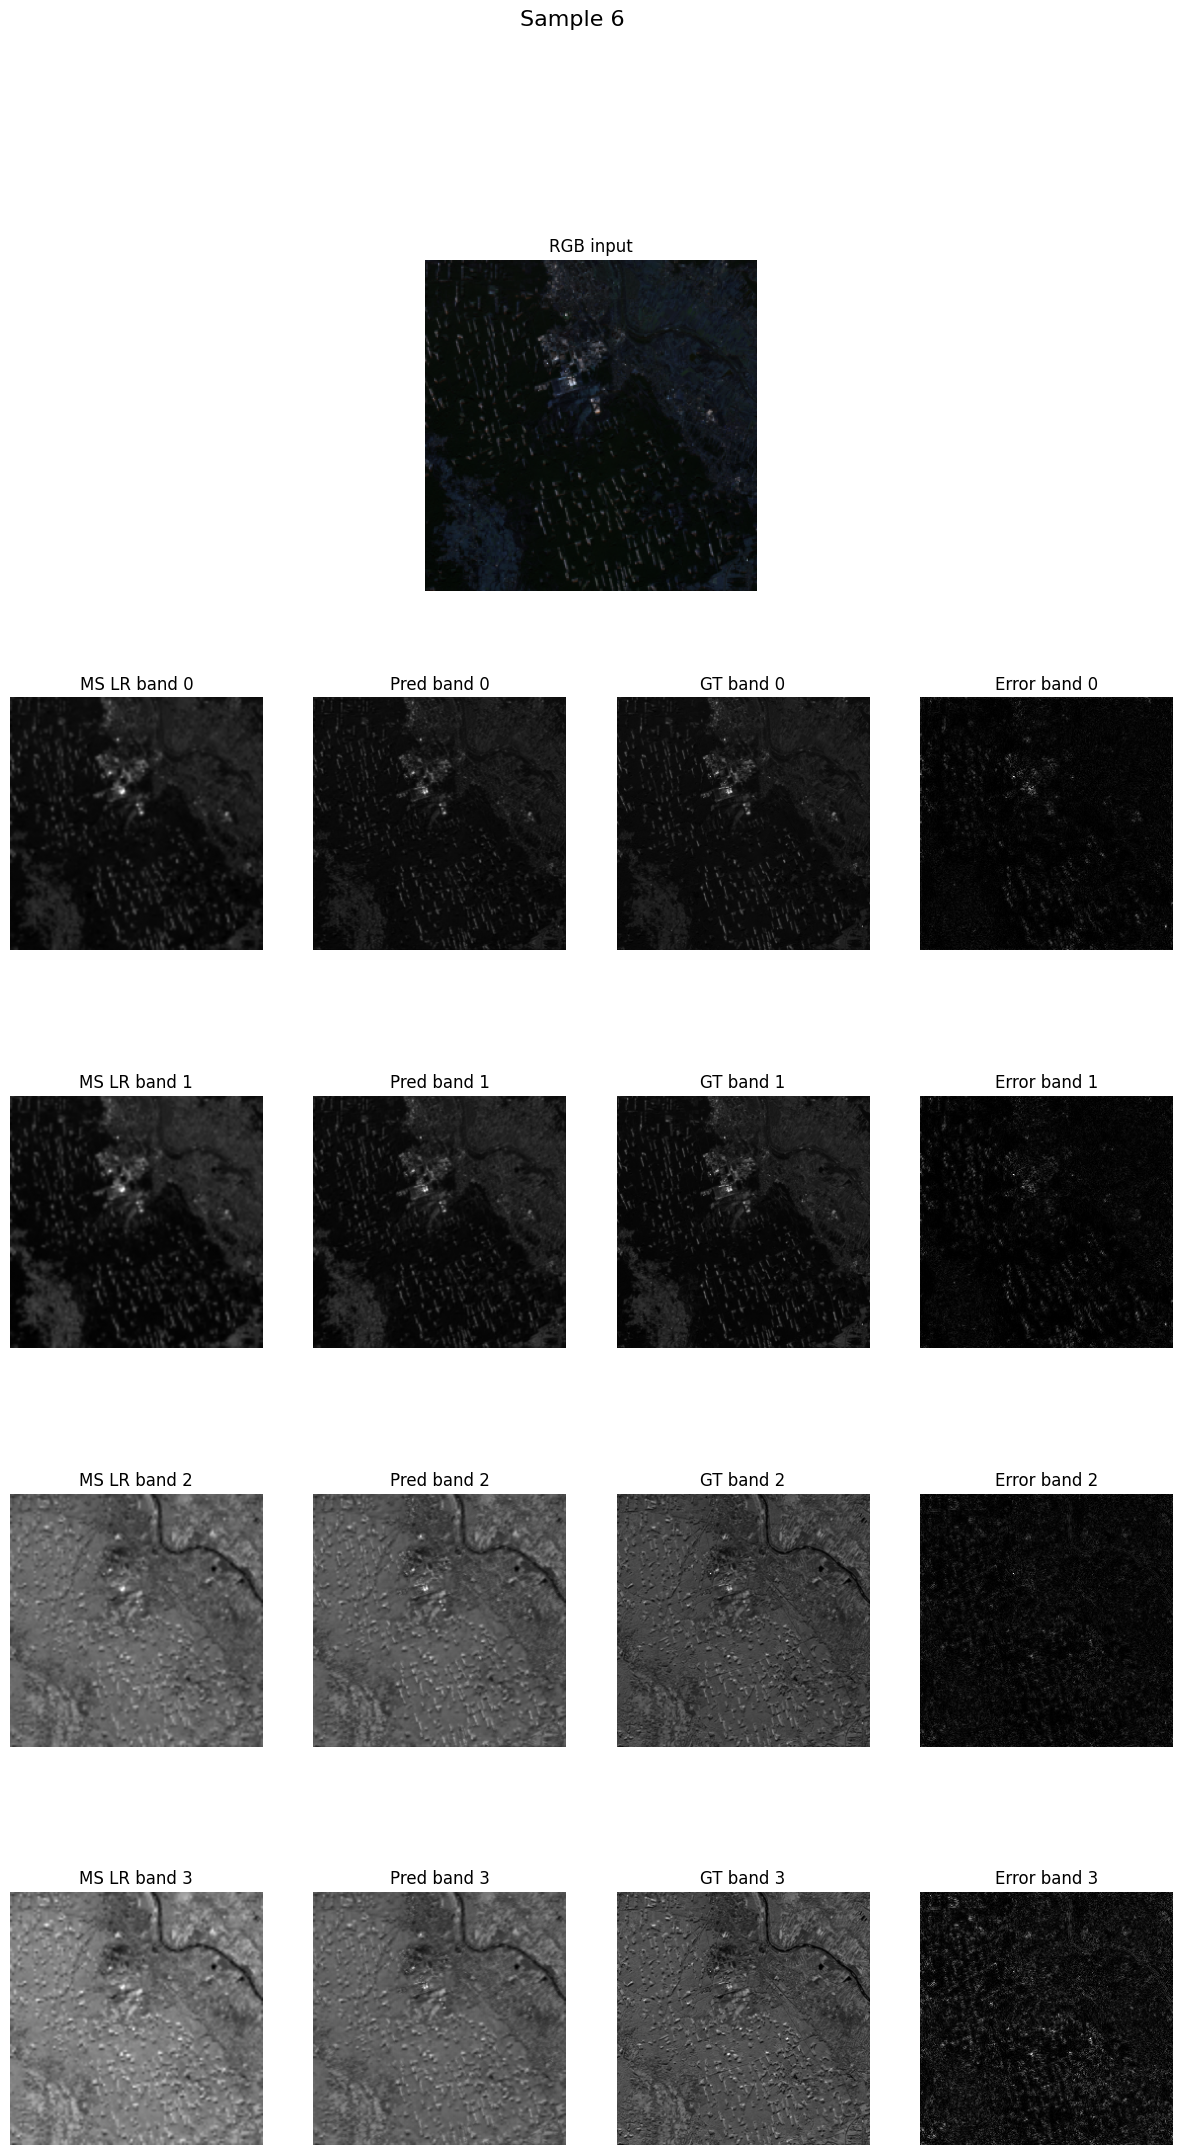

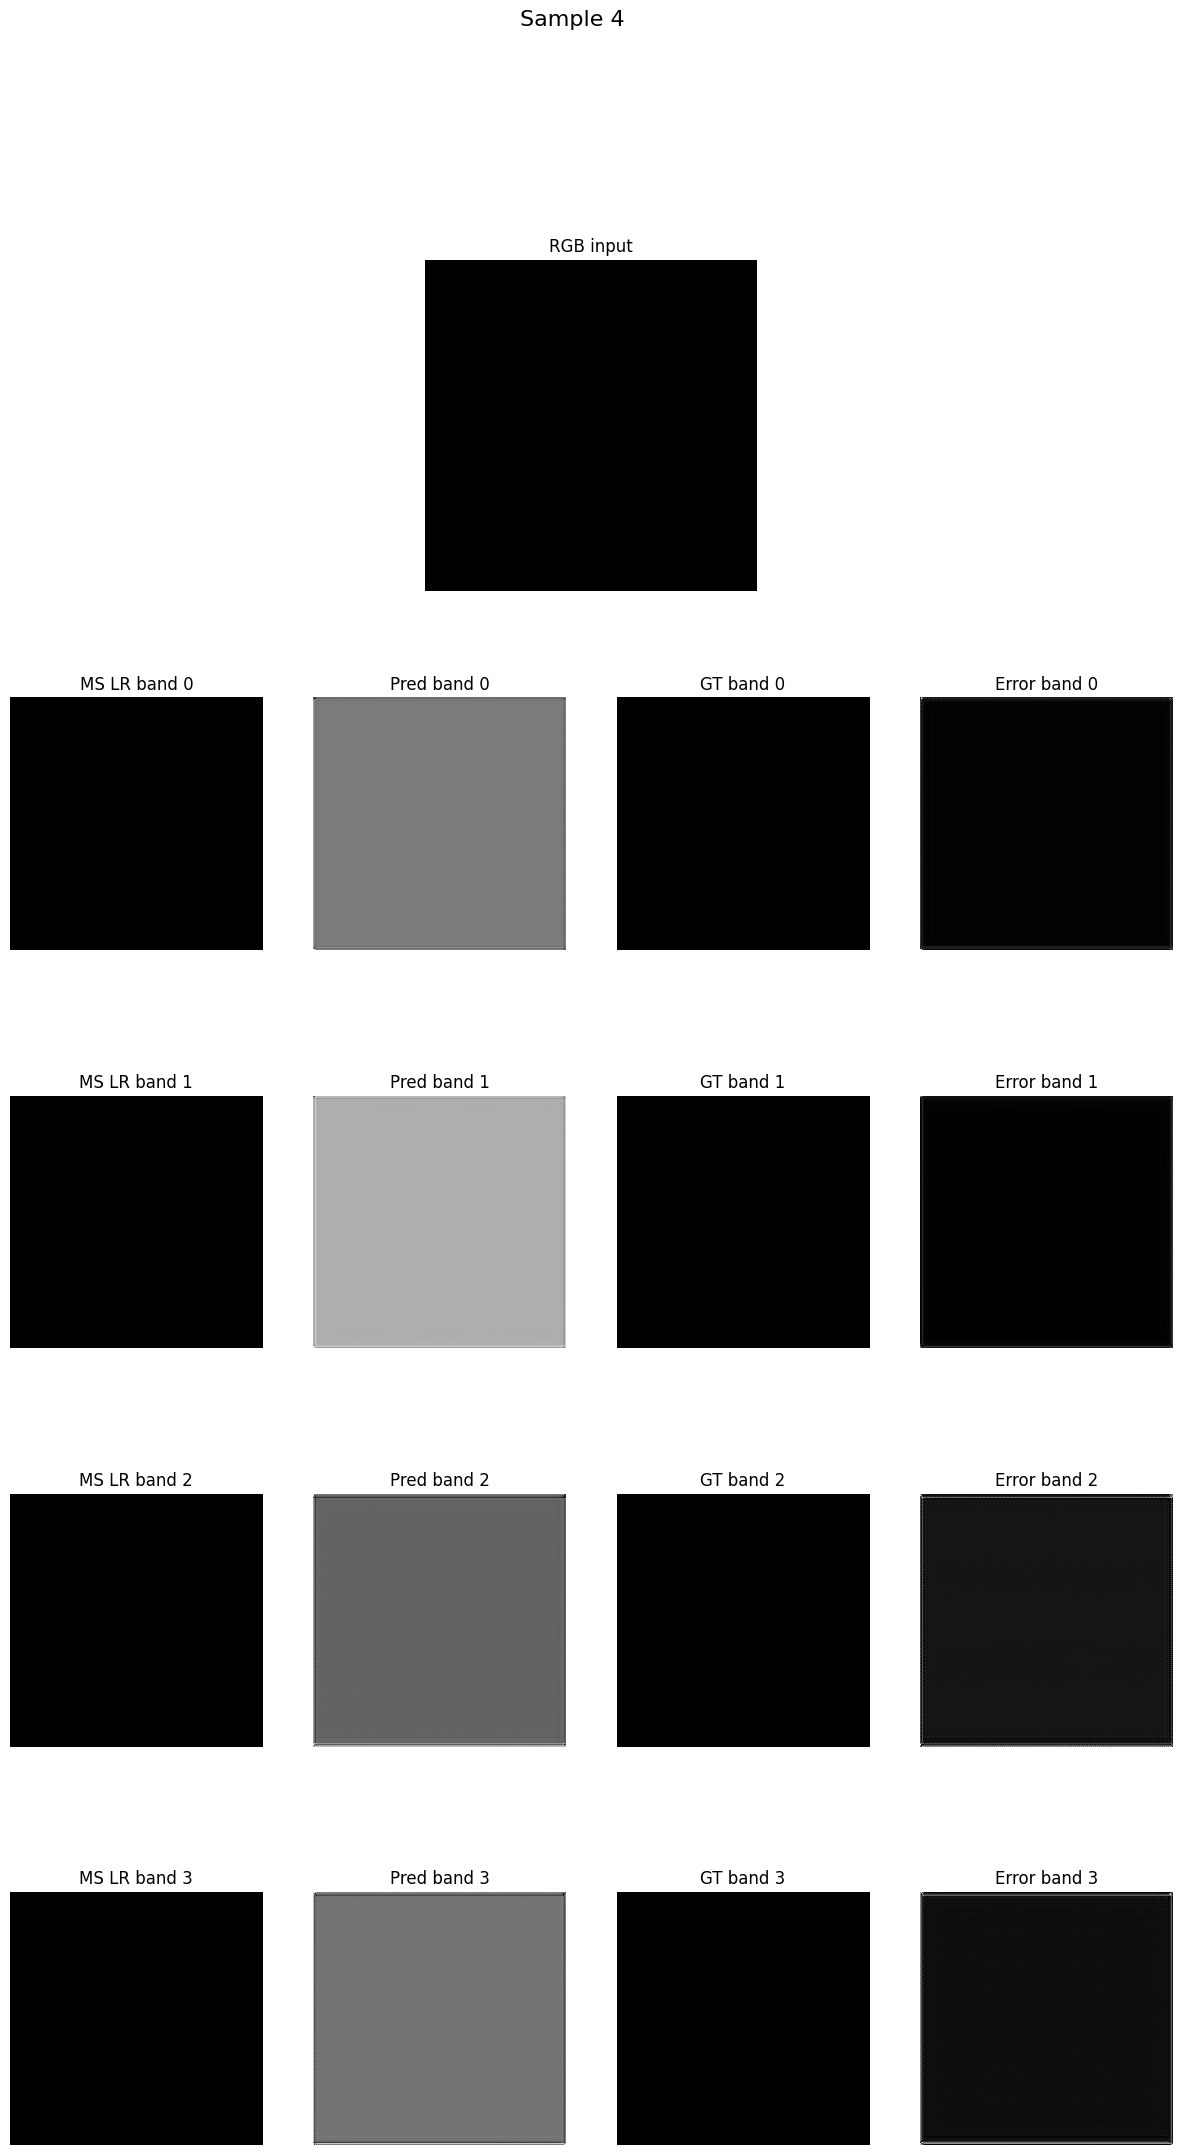

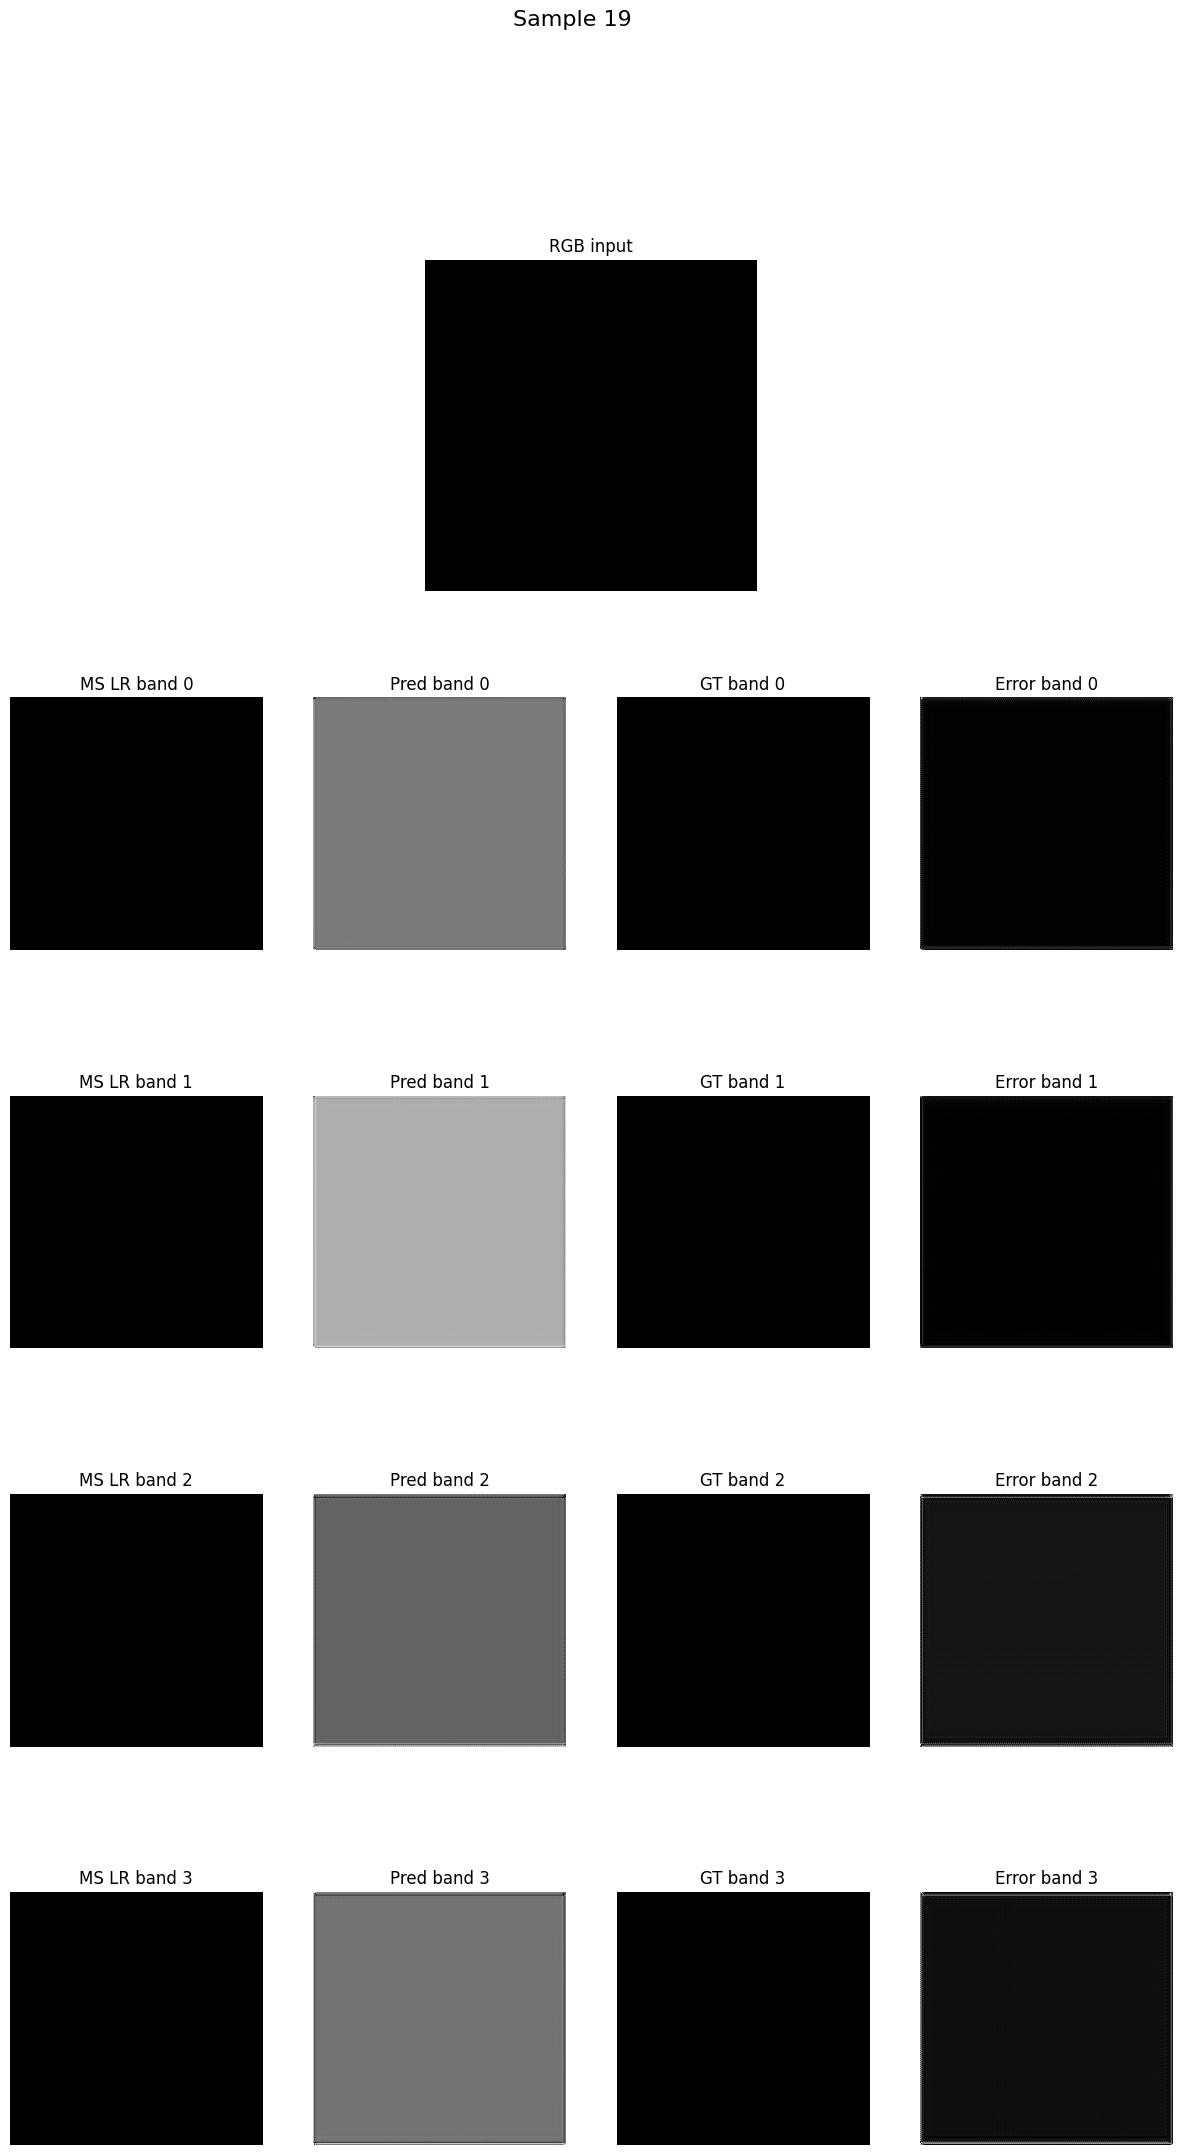

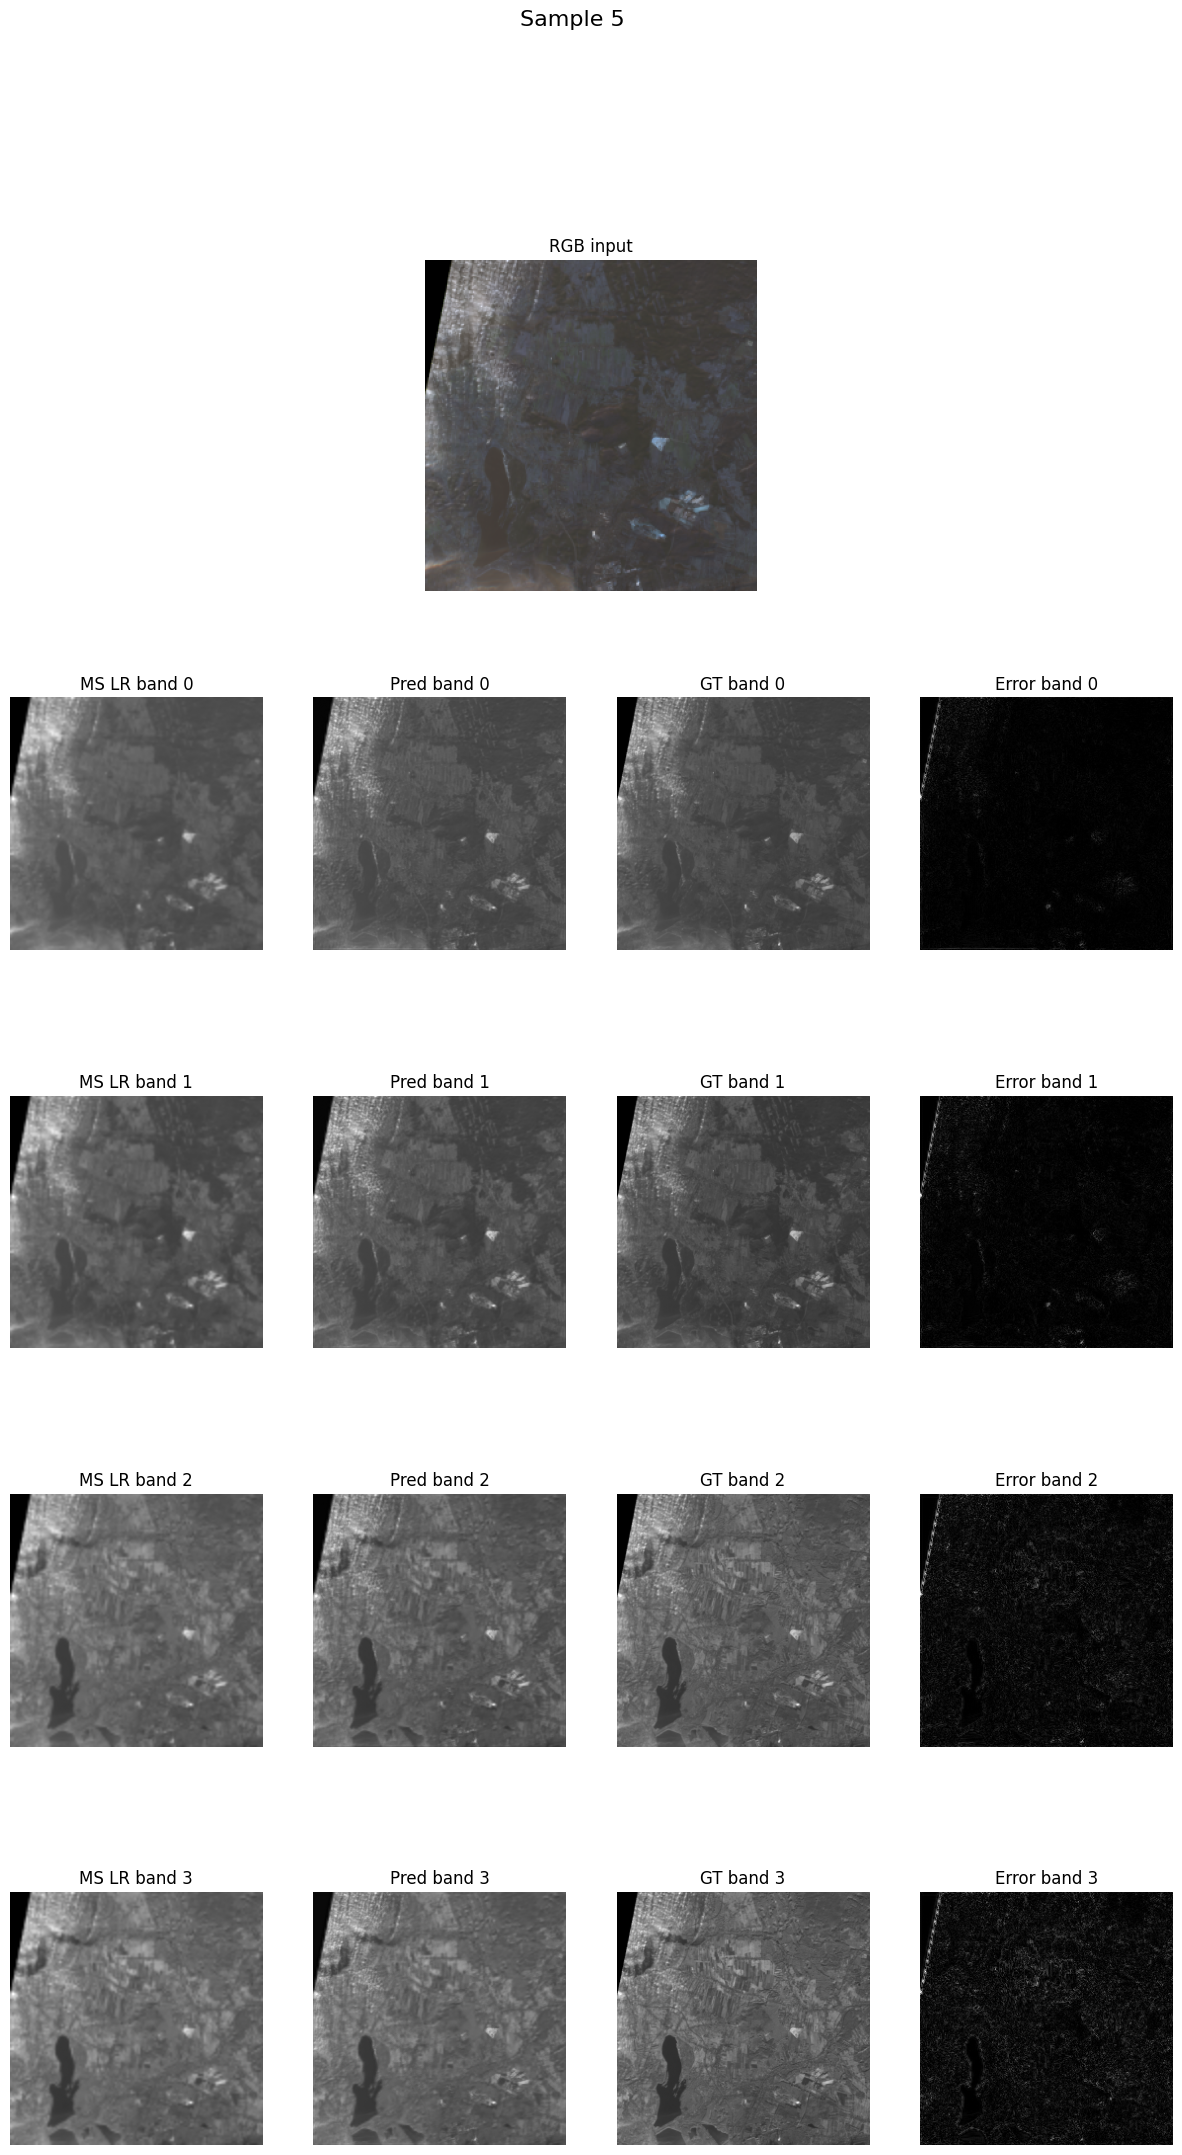

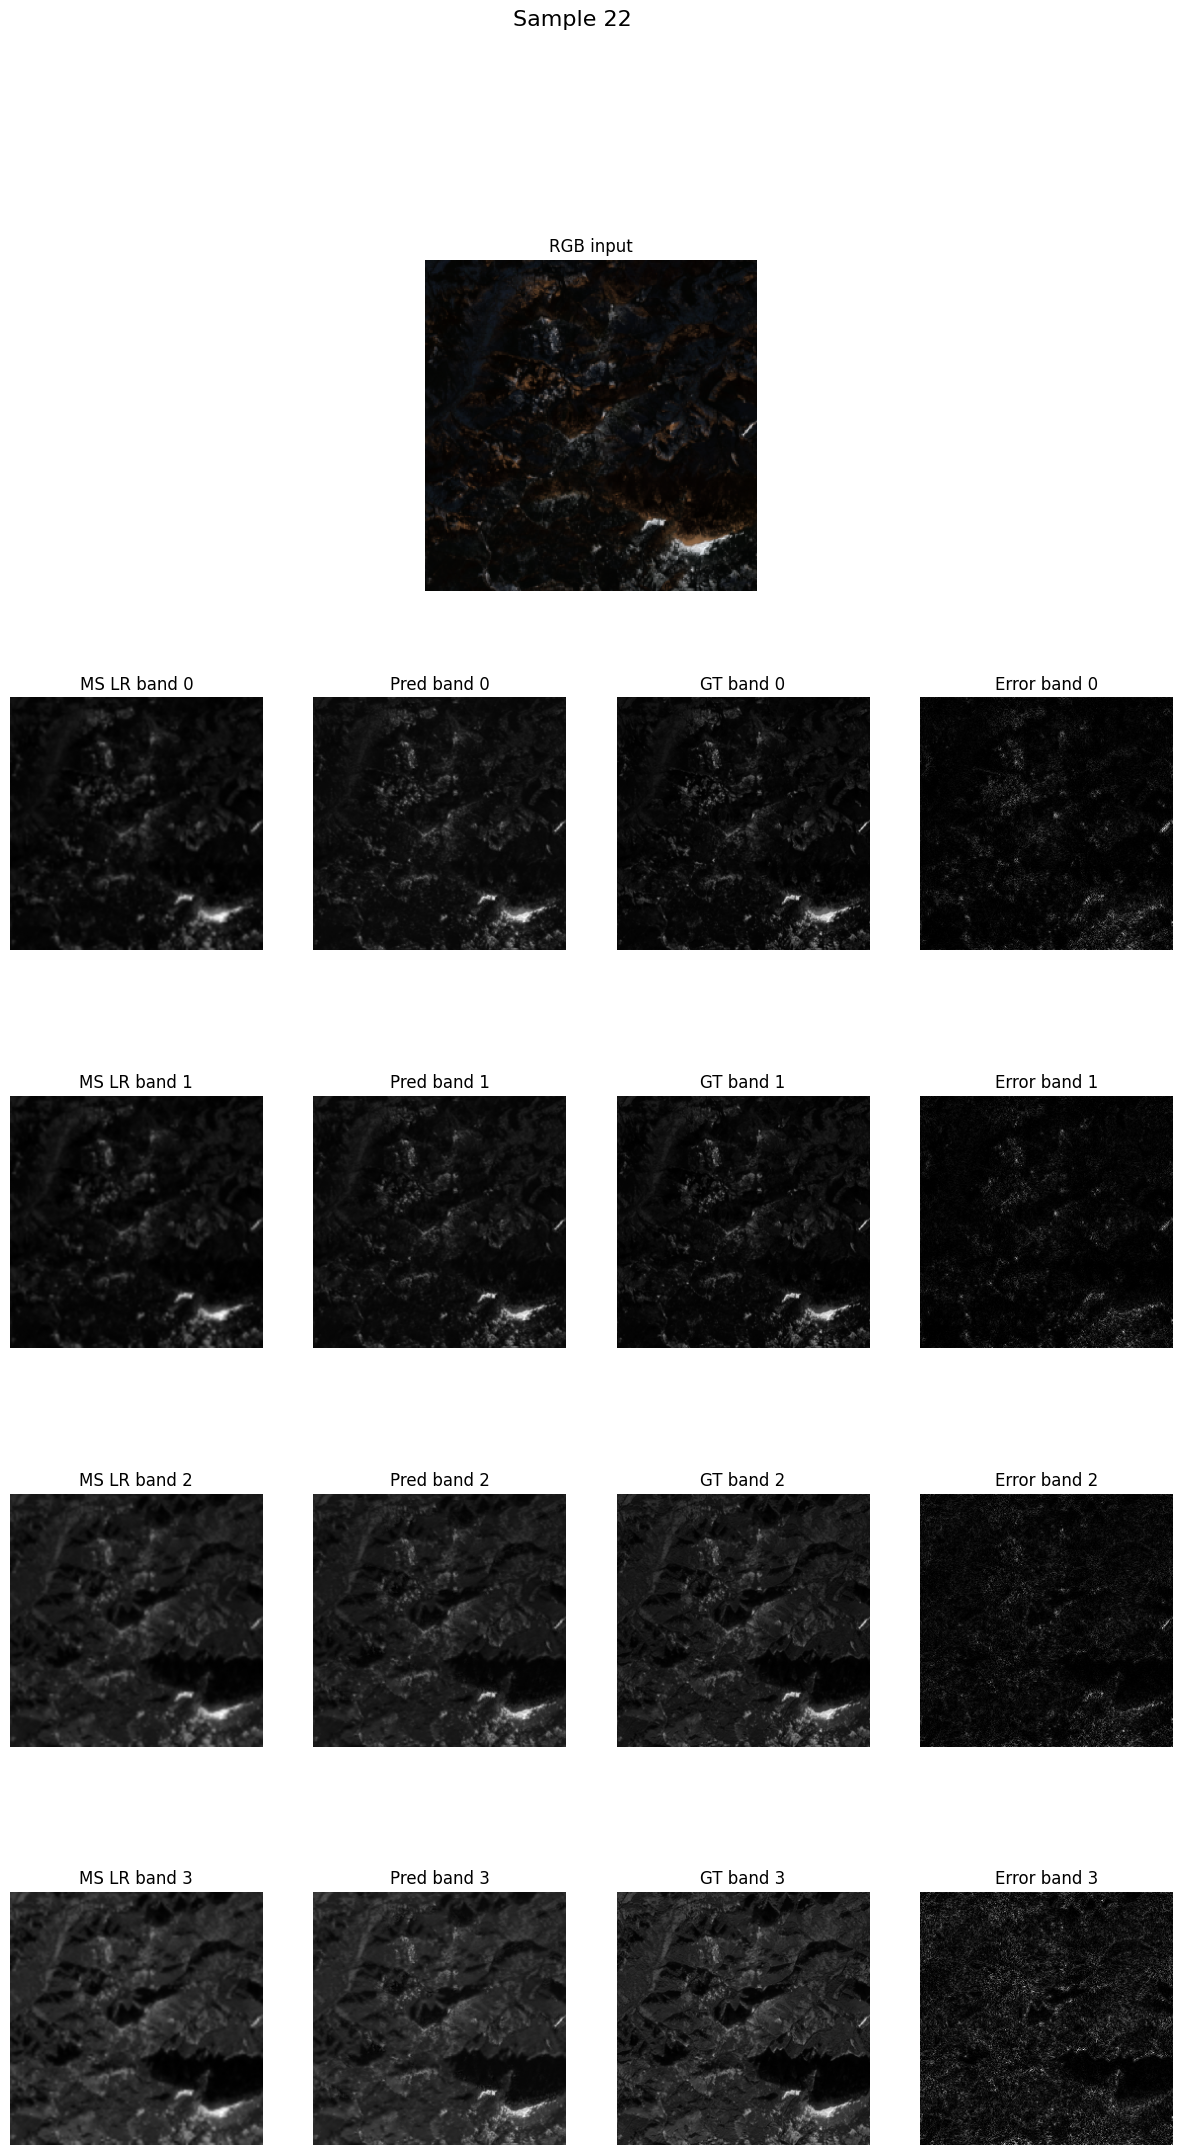

In [3]:
model = PanSharpenUnetLightning.load_from_checkpoint("./lightning_logs/version_3/checkpoints/pansharpen-unet-epoch=017-val_l1=0.0454.ckpt")

dataset = SentinelCroppedDataset("./dataset_sentinel")
dataloaders = dataset.produce_dataloaders() #train, val, test
normalization_params = compute_stats(dataloaders[0]) # rgb_mean, rgb_std, ms_mean, ms_std

plot_pansharpen_examples(
    model=model,
    test_loader=dataloaders[2],
    num_samples=5,
)